# 数据集1: Movies Dataset from Pirated Sites
 1. 数据摘要
    1.1属性
+ `IMDb-rating` 电影的IMDb评分
+ `appropriate_for` 电影分级,R 级、PG-13 等
+ `director` 电影导演
+ `downloads` 下载量
+ `id` 电影的唯一ID
+ `industry` 电影中心
+ `language` 语言
+ `posted_date` 电影在平台上发布的时间
+ `release_date` 电影在全球上映的时间
+ `run_time` 电影时长(分钟)
+ `storyline` 故事梗概
+ `title` 电影标题
+ `views` 观看量
+ `writer` 编剧列表

In [32]:
import pandas as pd
movie=pd.read_csv('dataset/movies_dataset.csv')
movie=movie.drop(columns=["Unnamed: 0"],inplace=False)
movie.columns.tolist()

['IMDb-rating',
 'appropriate_for',
 'director',
 'downloads',
 'id',
 'industry',
 'language',
 'posted_date',
 'release_date',
 'run_time',
 'storyline',
 'title',
 'views',
 'writer']

   1.2 标称属性可能取值的频数
+ `appropriate_for` 

In [33]:
movie['appropriate_for'].value_counts()

appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

+ `director` 电影导演

In [34]:
movie['director'].value_counts()

director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: count, Length: 9672, dtype: int64

+ `id` 电影的唯一ID

In [35]:
movie['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

唯一ID却有重复值，说明数据集中有重复的电影,经过验证,数据集中有重复的电影
+ `industry` 电影中心

In [36]:
movie['industry'].value_counts()

industry
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: count, dtype: int64

+ `language` 语言

In [37]:
movie['language'].value_counts()

language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: count, Length: 1167, dtype: int64

+ `posted_date` 电影在平台上发布的时间

In [38]:
movie['posted_date'].value_counts()

posted_date
13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
12 Sep, 2009      1
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
30 Nov, 2011      1
Name: count, Length: 4123, dtype: int64

+ `release_date` 电影在全球上映的时间

In [39]:
movie['release_date'].value_counts()

release_date
Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Sep 05 2003      1
Dec 29 2022      1
Aug 24 2013      1
Jan 12 2014      1
Mar 28 1958      1
Name: count, Length: 4886, dtype: int64

+ `writer` 编剧列表

In [40]:
movie['writer'].value_counts()

writer
Nicholas Schutt                           403
Venky Atluri                              402
Haley Harris                              402
John Swab                                 205
Elegance Bratton                          202
                                         ... 
Barbara Samuels, Joseph Boyden              1
Maria Allred                                1
Pia Mechler                                 1
Paul Flannery, David Ryan Keith             1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1
Name: count, Length: 13603, dtype: int64

+ `title` 电影标题

In [41]:
movie['title'].value_counts()

title
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: count, Length: 16572, dtype: int64

1.3 数值属性的五数概括
    缺失值的个数统计

In [42]:
missing_values=movie.isnull().sum()
missing_values=pd.DataFrame(missing_values,columns=['missing_values']).T
missing_values=missing_values.loc[:,(missing_values!=0).any(axis=0)]
missing_values

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
missing_values,841,9476,1938,1,1,546,1,1,1768,1701,1,1,2192


+ `views` 观看量
`views` 属性的五数概括

In [43]:
num_views = pd.to_numeric(movie['views'].str.replace(',','')).dropna()
num_views.describe()[3:]

min        667.0
25%       7571.5
50%      15222.0
75%      36571.0
max    1638533.0
Name: views, dtype: float64

+ `downloads` 下载量

In [44]:
num_downloads = pd.to_numeric(movie['downloads'].str.replace(',','')).dropna()
num_downloads.describe()[3:]

min         0.0
25%       855.5
50%      2716.0
75%     10070.0
max    391272.0
Name: downloads, dtype: float64

+ `run_time` 电影时长(分钟)
将不同时间格式转换为分钟

In [45]:
def convert_to_minutes(duration):
    if 'h' in duration or 'm' in duration:
        return pd.to_timedelta(duration).total_seconds()/60
    else:
        return pd.to_numeric(duration)
run_time_cleaned = movie['run_time'].dropna().astype(str).apply(convert_to_minutes)
run_time_cleaned.describe()[3:]

min      2.0
25%     90.0
50%    100.0
75%    117.0
max    321.0
Name: run_time, dtype: float64

+ `IMDb-rating` 电影的IMDb评分

In [46]:
rating_cleaned = movie['IMDb-rating'].dropna()
rating_cleaned.describe()[3:]

min    1.1
25%    4.8
50%    5.7
75%    6.6
max    9.9
Name: IMDb-rating, dtype: float64

# 2.数据可视化
    2.1 电影分级 属性的直方图

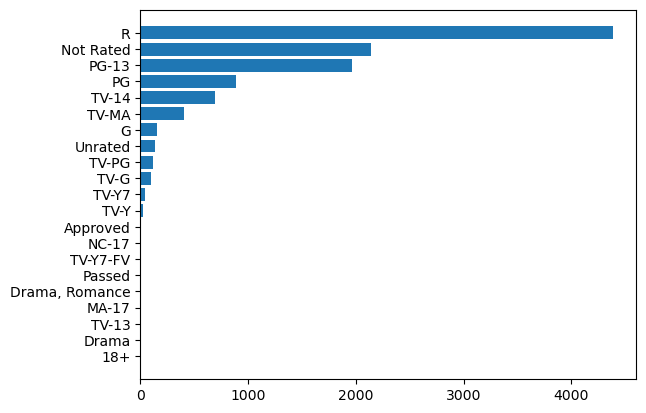

In [47]:
import matplotlib.pyplot as plt
appr_counts = movie['appropriate_for'].value_counts().sort_values(ascending=True)
plt.barh(appr_counts.index,appr_counts.values)
plt.show()

    2.2 电影语言 属性的直方图

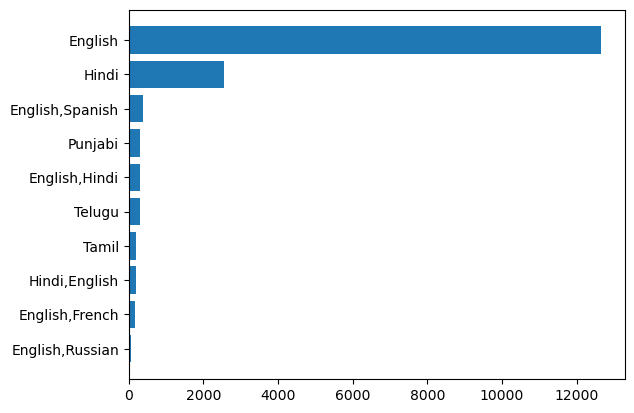

In [48]:
lang_counts = movie['language'].value_counts().sort_values()[-10:]
plt.barh(lang_counts.index,lang_counts.values)
plt.show()

    2.3 电影中心 属性的直方图

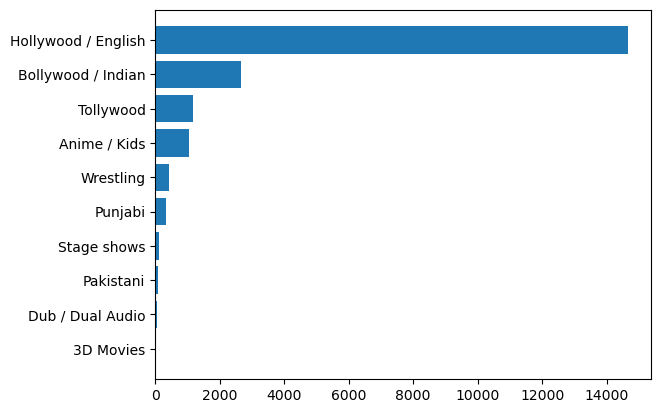

In [49]:
ind_counts = movie['industry'].value_counts().sort_values()[-10:]
plt.barh(ind_counts.index,ind_counts.values)
plt.show()

    2.4 平台发布时间 属性的直方图

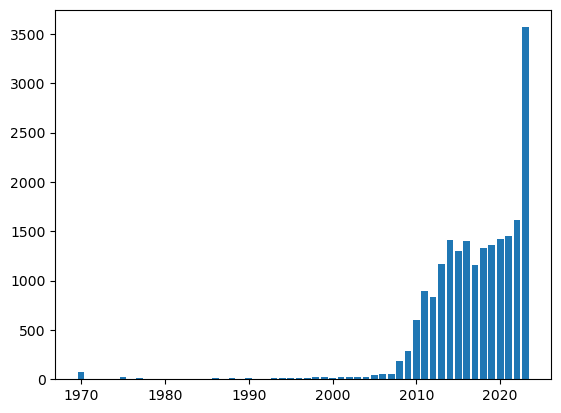

In [50]:
pyear_counts = pd.to_datetime(movie['posted_date']).dt.year.value_counts()
plt.bar(pyear_counts.index,pyear_counts.values)
plt.show()

    2.5 全球上映时间 属性的直方图

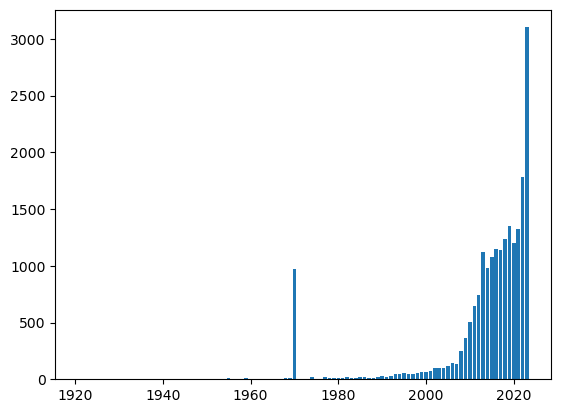

In [51]:
ryear_counts = pd.to_datetime(movie['release_date']).dt.year.value_counts()
plt.bar(ryear_counts.index,ryear_counts.values)
plt.show()

    2.6 电影导演 属性的直方图

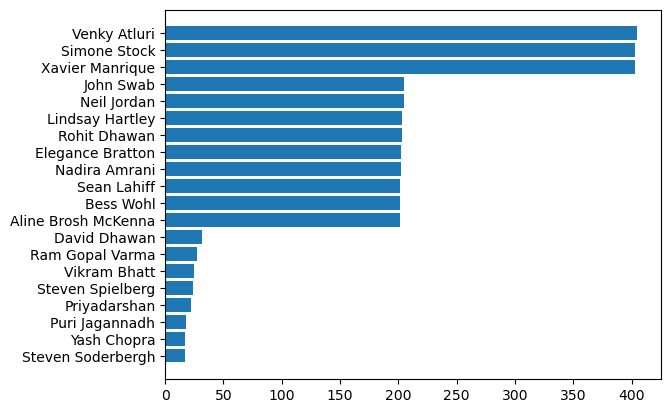

In [52]:
director_counts = movie['director'].value_counts().sort_values()[-20:]
plt.barh(director_counts.index,director_counts.values)
plt.show()

2.7 电影各项数值属性

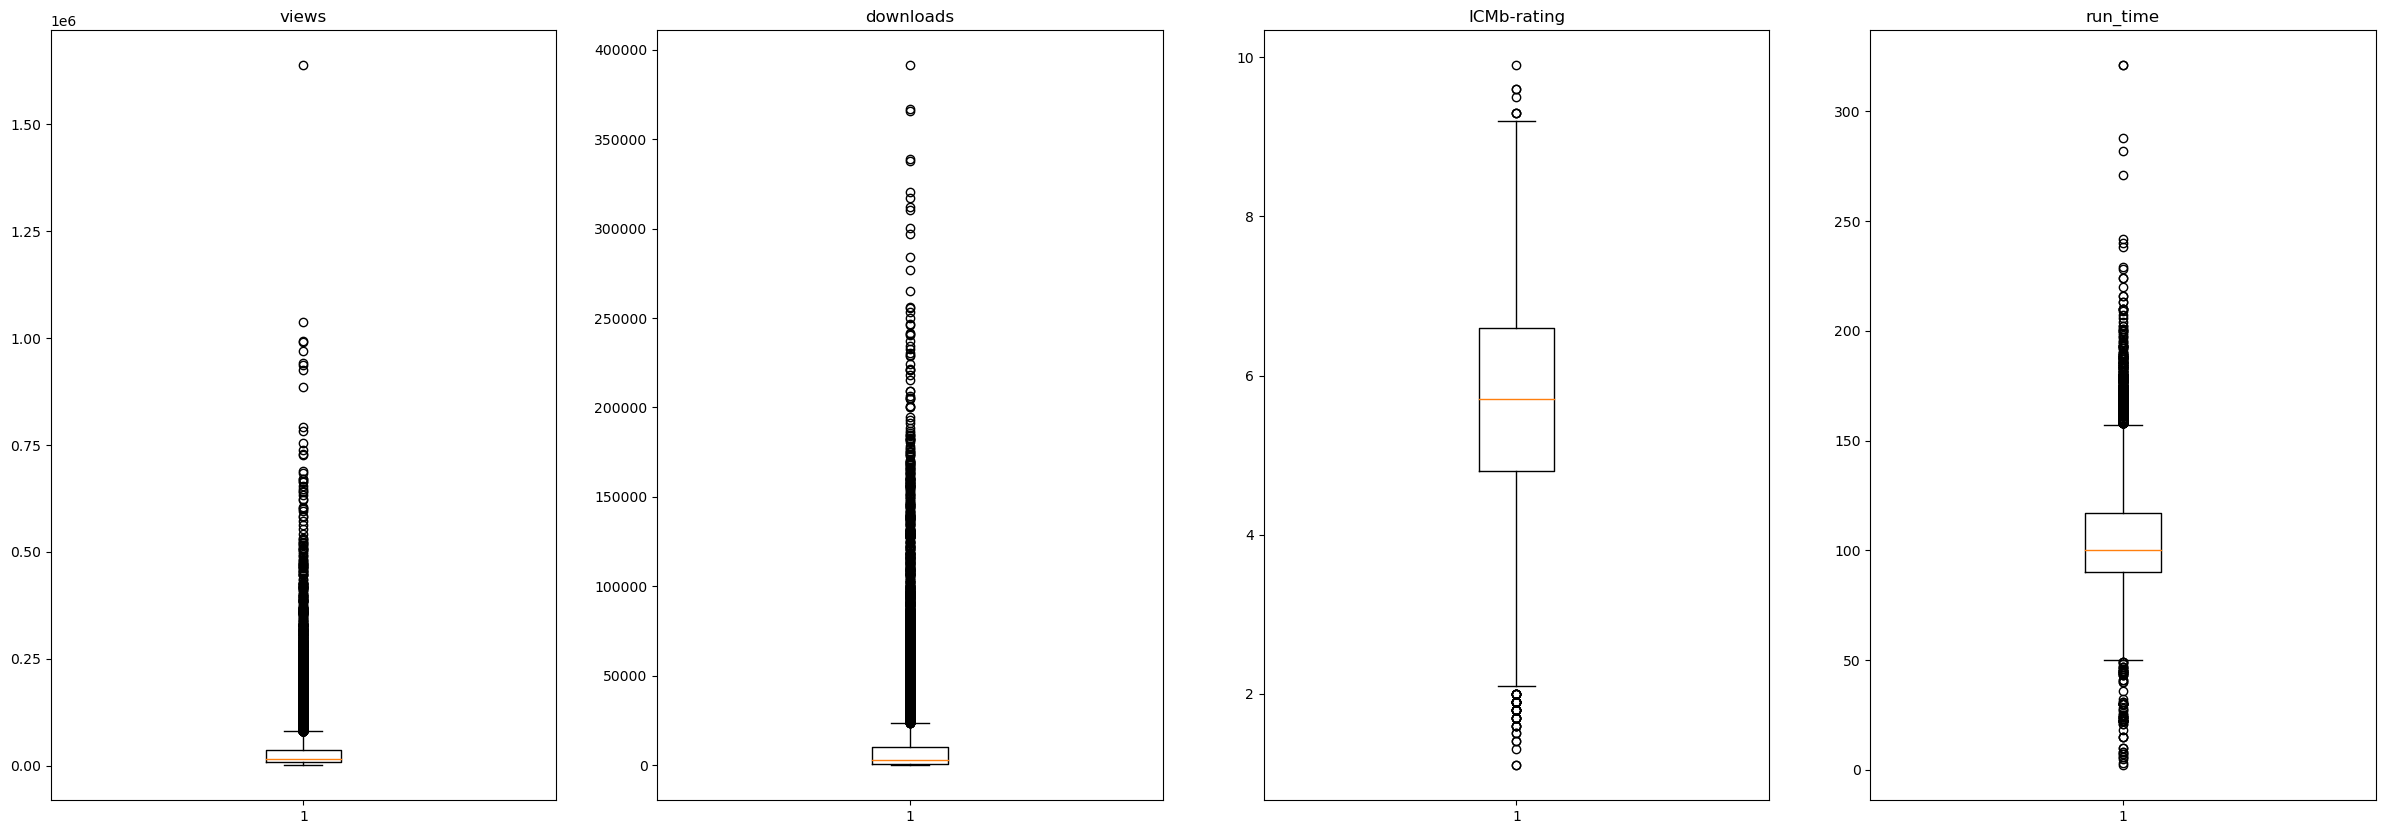

In [53]:
fig,ax=plt.subplots(1,4,figsize=(30,10))
ax[0].boxplot(num_views)
ax[0].set_title('views')
ax[1].boxplot(num_downloads)
ax[1].set_title('downloads')
ax[2].boxplot(rating_cleaned)
ax[2].set_title('ICMb-rating')
ax[3].boxplot(run_time_cleaned)
ax[3].set_title('run_time')
plt.show()

3. 缺失值处理
3.1 剔除缺失部分

In [54]:
print(movie.shape)
movie_df_cleaned = movie.dropna()
print(movie_df_cleaned.shape)

(20548, 14)
(9902, 14)


3.2 用最高频率值来填补缺失值

In [55]:
movie_df_cleaned = movie.copy()
replace_values = missing_values.copy().rename(index={'missing_values':'replace_values'})
for col in replace_values.columns:
    if missing_values.loc['missing_values',col] == 0:
        continue
    mode = movie[col].mode()[0]
    movie_df_cleaned[col].fillna(mode,inplace=True)
    replace_values.loc['replace_values',col] = mode
replace_values

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
replace_values,6.6,R,Venky Atluri,75,Hollywood / English,English,"13 Feb, 2023",Jan 01 1970,93,Follows\r\n a New York City family hiding out ...,The Girl Who Escaped: The Kara Robinson Story,"6,259",Nicholas Schutt


 3.3 通过属性的相关关系填补缺失值
部分`language`属性可通过`industry`属性用下划线分割后的最后一个子串获得，比如"Hollywood/English"

In [56]:
rows_can_fix = movie[movie['language'].isnull()&movie['industry'].notnull()]
rows_can_fix

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
291,NaN,NaN,NaN,265,370047,Wrestling,NaN,"06 Jan, 2023",Jan 05 2023,NaN,NaN,TNA.Impact 2023-01-05,"1,266",NaN
396,5.6,TV-G,Michael Lembeck,193,369257,Hollywood / English,NaN,"17 Dec, 2022",Dec 16 2022,NaN,Your\r\n family is in for a flurry of fun with...,Snow Day,"3,284","Samantha Martin, Will McRobb, Chris Viscardi"
518,NaN,NaN,NaN,"2,847",368289,Wrestling,NaN,"26 Nov, 2022",Nov 25 2022,NaN,NaN,WWE Smackdown 2022-11-26,"7,356",NaN
1453,5.5,NaN,Nyla Innuksuk,593,361520,Hollywood / English,NaN,"27 Jun, 2022",Jun 24 2022,86,When\r\n Maika and her ragtag friends discover...,Slash/Back,"6,863","Ryan Cavan, Nyla Innuksuk"
1637,7.5,Approved,Kirk Harris,580,359910,Hollywood / English,NaN,"21 May, 2022",Apr 01 2022,96,"It centers on Kate, a widow who lost her husba...",Dakota,"5,869",Johnny Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,NaN,NaN,NaN,"10,381",832,Stage shows,NaN,"28 Jun, 2005",Apr 15 2010,NaN,NaN,Sallam Karachi,"17,906",NaN
20271,NaN,NaN,NaN,"5,575",279,Anime / Kids,NaN,"29 Jun, 1998",Jun 29 1998,NaN,NaN,Antz 1998,"15,862",NaN
20458,NaN,NaN,NaN,"3,002",129,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Munda Pangi Sal Da,"6,362",NaN
20459,NaN,NaN,NaN,"2,628",130,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Rusmalaiyan,"3,928",NaN


In [57]:
import numpy as np
rows_can_fix.loc[:, 'language'] = rows_can_fix['industry'].apply(lambda x: x.split()[-1] if '/' in x else np.nan)
rows_can_fix

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
291,NaN,NaN,NaN,265,370047,Wrestling,NaN,"06 Jan, 2023",Jan 05 2023,NaN,NaN,TNA.Impact 2023-01-05,"1,266",NaN
396,5.6,TV-G,Michael Lembeck,193,369257,Hollywood / English,English,"17 Dec, 2022",Dec 16 2022,NaN,Your\r\n family is in for a flurry of fun with...,Snow Day,"3,284","Samantha Martin, Will McRobb, Chris Viscardi"
518,NaN,NaN,NaN,"2,847",368289,Wrestling,NaN,"26 Nov, 2022",Nov 25 2022,NaN,NaN,WWE Smackdown 2022-11-26,"7,356",NaN
1453,5.5,NaN,Nyla Innuksuk,593,361520,Hollywood / English,English,"27 Jun, 2022",Jun 24 2022,86,When\r\n Maika and her ragtag friends discover...,Slash/Back,"6,863","Ryan Cavan, Nyla Innuksuk"
1637,7.5,Approved,Kirk Harris,580,359910,Hollywood / English,English,"21 May, 2022",Apr 01 2022,96,"It centers on Kate, a widow who lost her husba...",Dakota,"5,869",Johnny Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,NaN,NaN,NaN,"10,381",832,Stage shows,NaN,"28 Jun, 2005",Apr 15 2010,NaN,NaN,Sallam Karachi,"17,906",NaN
20271,NaN,NaN,NaN,"5,575",279,Anime / Kids,Kids,"29 Jun, 1998",Jun 29 1998,NaN,NaN,Antz 1998,"15,862",NaN
20458,NaN,NaN,NaN,"3,002",129,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Munda Pangi Sal Da,"6,362",NaN
20459,NaN,NaN,NaN,"2,628",130,Stage shows,NaN,"01 Jan, 1970",Jan 01 1970,NaN,NaN,Rusmalaiyan,"3,928",NaN


修复结果如上
3.3 用数据对象之间的相似性填补缺失值

In [58]:
from sklearn.metrics.pairwise import nan_euclidean_distances

movie['views'] = num_views
movie['downloads'] = num_downloads
def convert_to_minutes(duration):
    if pd.isna(duration):
        return duration
    elif 'h' in str(duration) or 'm' in str(duration):
        return pd.to_timedelta(duration).total_seconds()/60
    else:
        return pd.to_numeric(duration)
movie['run_time'] = movie['run_time'].apply(convert_to_minutes)
rows_with_missing = movie[movie.isnull().any(axis=1)]
numeric_rows_with = rows_with_missing[['views','downloads','IMDb-rating','run_time']]
rows_without_missing = movie[~movie.isnull().any(axis=1)]
numeric_rows_without = rows_without_missing[['views','downloads','IMDb-rating','run_time']]
interpoted = rows_with_missing.copy()
for row in numeric_rows_with.itertuples():
    # 计算当前行与其他行的欧氏距离，忽略NaN值
    distances = nan_euclidean_distances([numeric_rows_with.loc[row.Index]], numeric_rows_without)[0]
    nearest_row_index = np.argmin(distances)
    nearest_row = rows_without_missing.iloc[nearest_row_index]
    # 使用最近邻行的值填充缺失值
    interpoted.loc[row.Index] = nearest_row

interpoted

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
3,7.5,R,James Toback,1693.0,398,Hollywood / English,English,"27 Mar, 2009",Mar 27 2009,90.0,Mike Tyson narrates his life story as a reacti...,Tyson,4793.0,James Toback
4,6.0,R,Miranda Bailey,395.0,312018,Hollywood / English,English,"13 Sep, 2019",Jun 21 2019,109.0,A normal father's family life is turned upside...,You Can Choose Your Family (Being Frank),2519.0,Glen Lakin
5,5.6,PG,Simon Wincer,584.0,9918,Hollywood / English,"English,Arabic","05 Mar, 2012",Mar 03 2012,99.0,"Born into a legendary racing family, jockeys D...",The Cup,3027.0,"Eric O'Keefe, Simon Wincer"
6,5.2,R,Paul Solet,5075.0,5227,Hollywood / English,English,"06 Jan, 2011",Nov 07 2009,85.0,Madeline Matheson is eight months pregnant and...,Grace,12113.0,Paul Solet
9,6.1,R,Clark Gregg,1900.0,93653,Hollywood / English,English,"09 May, 2014",Apr 20 2013,90.0,A struggling agent for child actors and former...,Trust Me,9771.0,Clark Gregg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,8.1,R,"Joel Coen, Ethan Coen",2004.0,11892,Hollywood / English,English,"04 Oct, 2012",Apr 05 1996,98.0,Jerry works in his father-in-law's car dealers...,Fargo,6185.0,"Ethan Coen, Joel Coen"
20544,5.2,Not Rated,Turner Clay,6072.0,12222,Hollywood / English,English,"02 Jan, 2013",Jan 01 2013,90.0,Chaos consumes a small town when a chemical fa...,State of Emergency,16127.0,Turner Clay
20545,5.5,R,Robert Lieberman,3280.0,3235,Hollywood / English,English,"25 Oct, 2010",Jan 01 1970,79.0,"In Rutland Country, the six year-old Benjamin ...",The Tortured,6690.0,Marek Posival
20546,6.3,PG,Sue Ann Taylor,65.0,336256,Hollywood / English,English,"17 Nov, 2020",Nov 10 2020,94.0,"Coming home from his last deployment, Sgt. Maj...",Charlie's Christmas Wish,1400.0,Sue Ann Taylor
